In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv('data_for_lr.csv')

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [7]:
## data processing

In [47]:
data = data.dropna()

In [48]:
data.shape

(699, 2)

In [12]:
### splitting the data

In [49]:
# training input and output

train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation data
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

## Liner Regression

#### 1. forward propagation
#### f(x) = m*x + c

In [43]:
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m,train_input) + c
    return predictions

#### 2. cost function

#### summation(1/2n * (y-f(x))^2)

In [26]:
def cost_function(predictions,train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5
    
    return cost

#### 3. Gradient Descent for backpropagation

#### df = f(x) - y
#### dm = df * x
#### dc = df *1

In [30]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

#### 4. Update parameters
#### m' = m -(learning_rate*dm)
#### c' = c- (learning_rate*dc)

In [32]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    
    return parameters

### model training

In [53]:
def train(train_input, train_output, learning_rate, iters):
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #1. forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #2. cost_function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, loss = {} ".format(i+1,cost))
        
        #plot function
        
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+' , label = "Original")
        ax.plot(train_input, predictions, 'o',label = "Training")
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, 'o')
        
        plt.show()
        
        #3. back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #4. update parameters
        parameters = update_parameters(parameters,derivatives,learning_rate)
        
    return parameters, loss

In [54]:
### training

Iteration = 1, loss = 281.3391287915794 


<Figure size 432x288 with 0 Axes>

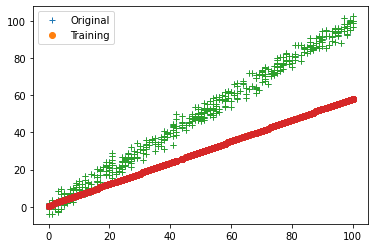

Iteration = 2, loss = 129.83027666478148 


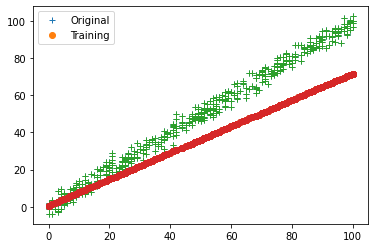

Iteration = 3, loss = 61.0905401098323 


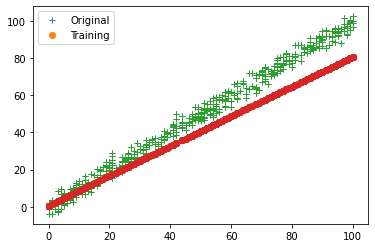

Iteration = 4, loss = 29.90324296844183 


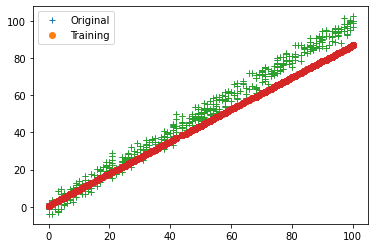

Iteration = 5, loss = 15.753529183739836 


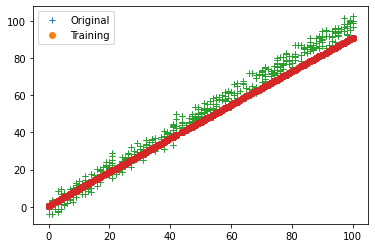

Iteration = 6, loss = 9.333785839624296 


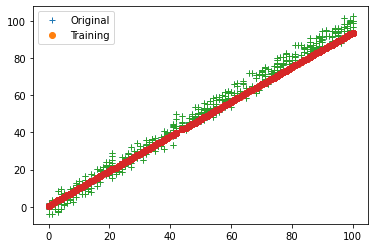

Iteration = 7, loss = 6.421138646563915 


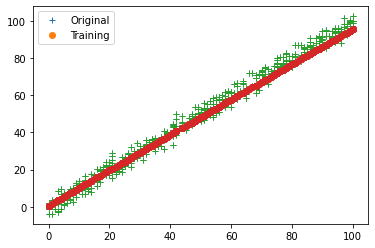

Iteration = 8, loss = 5.099664861968845 


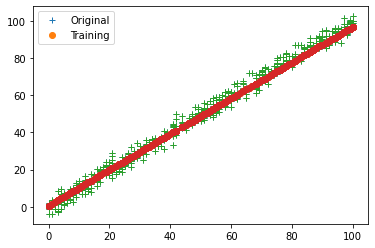

Iteration = 9, loss = 4.500108215370991 


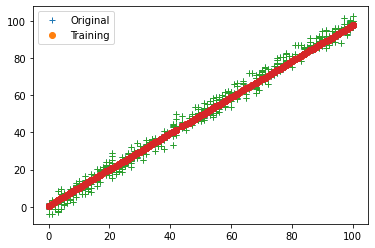

Iteration = 10, loss = 4.2280861740349405 


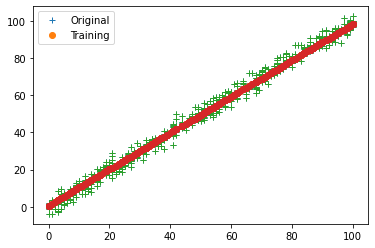

Iteration = 11, loss = 4.104666946024284 


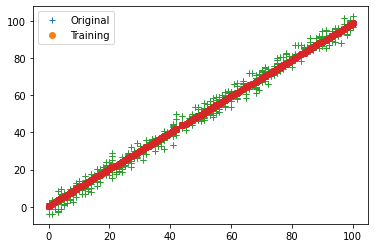

Iteration = 12, loss = 4.048668979145219 


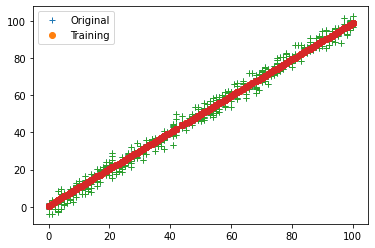

Iteration = 13, loss = 4.023260113247395 


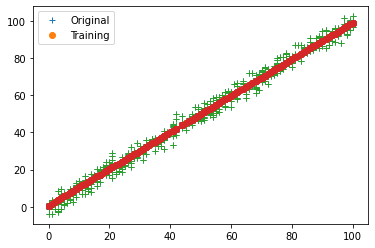

Iteration = 14, loss = 4.011729556473763 


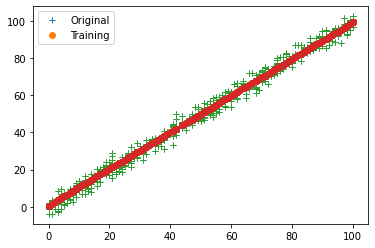

Iteration = 15, loss = 4.006495604049221 


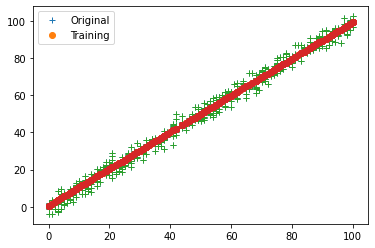

Iteration = 16, loss = 4.004118428119481 


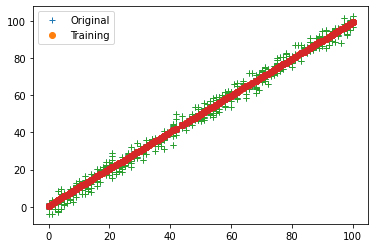

Iteration = 17, loss = 4.003037374976955 


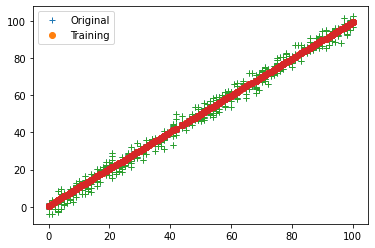

Iteration = 18, loss = 4.00254437430586 


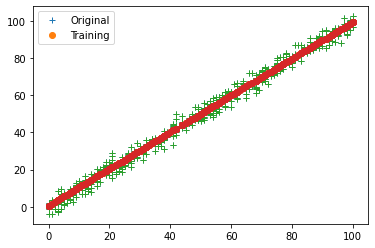

Iteration = 19, loss = 4.002318173819632 


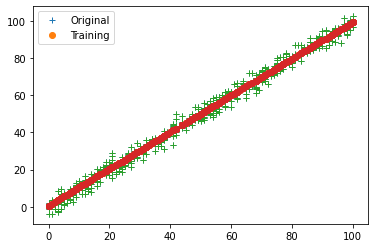

Iteration = 20, loss = 4.002213021000014 


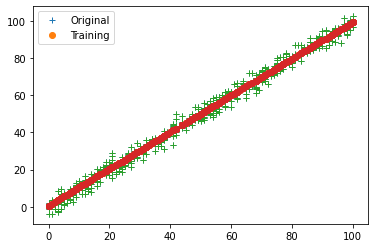

In [55]:
parameters, loss = train(train_input, train_output, 0.0001,20)

In [56]:
print(parameters)

{'m': 0.9879235596862251, 'c': 0.6174852502293829}


In [59]:
loss

[281.3391287915794,
 129.83027666478148,
 61.0905401098323,
 29.90324296844183,
 15.753529183739836,
 9.333785839624296,
 6.421138646563915,
 5.099664861968845,
 4.500108215370991,
 4.2280861740349405,
 4.104666946024284,
 4.048668979145219,
 4.023260113247395,
 4.011729556473763,
 4.006495604049221,
 4.004118428119481,
 4.003037374976955,
 4.00254437430586,
 4.002318173819632,
 4.002213021000014]

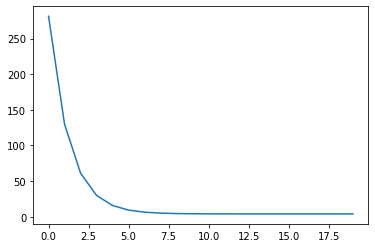

In [60]:
plt.plot(loss)

In [61]:
### Validation

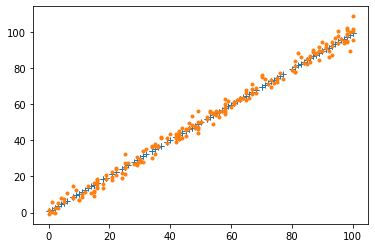

In [63]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input,test_output,".")
plt.show()

In [64]:
## cost of prediction

In [65]:
cost_function(test_output,test_predictions)

4.014252892285782